# 머신러닝 개요

## 머신러닝 정의
- 수치를 예측하는 회귀, 카테고리를 예측하는 분류, 최적의 추천 등을 수행하는 소프트웨어로, 데이터를 보고 학습하여 점차 성능이 개선된다
- 현재 인공지능을 구현하는 대표적인 방법이 머신러닝 기법이다
 - 인공지능을 구현하는 다른 방법으로 "생각하는" 컴퓨터를 만들거나, 언어를 문법적으로 이해하는 컴퓨터를 만드는 것, 또는 사람의 지식을 알고리즘이나 데이터로 구축하는 방법은 성공하지 못했다
 

- 머신러닝 동작
<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.08.38.png?raw=1" align='left'>

### 데이터 (X)
- 훈련 (train) 데이터: 모델을 학습시키는데 사용하는 데이터
- 검증 (validation) 데이터: 학습시킨 모델의 동작을 검증하는데 사용하는 데이터
- 학습에 사용하는 데이터가 많을수록 예측, 추천 성능이 향상된다
 - 데이터 타입: 정형 데이터(테이블 데이터), 비정형 데이터(이미지, 텍스트, 센서 데이터 등)
- 머신러닝 모델의 성능을 높이기 위해서는 원시(raw) 데이터로부터 적절한 학습 및 검증 데이터를 만드는 **데이터 전처리**가 반드시 필요하다

### 머신러닝 모델
- 입력 데이터(X)로부터 최적의 출력(y)을 얻는 소프트웨어
- 최적의 출력이란 정답(label, target)을 잘 예측하는 것을 말한다
 - 최적의 출력을 얻기 위해서 모델을 구성하는 파라미터의 최적치를 찾는다(예: 선형 회귀에서 가중치 값)
- 모델의 종류: 선형모델, 로지스틱 회귀, SVM, 결정트리, 랜덤 포레스트, kNN, 베이시언, 딥러닝 모델 (MLP, CNN, RNN 등)

### 목적
- 머신러닝의 목적은 다음 중 하나이다
 - 예측(predictive) 분석
> 회귀 예측(regression): 수치를 예측  
> 분류 예측(classification): 카테고리를 예측
 - 설명(descriptive)적 분석
 - 군집화(clustering)
 - 추천(recommendation)
 
### 성능평가 (performance measure)
- 모델이 원하는 동작을 잘 수행하는지를 평가하는 값으로, 주요 평가 척도는 다음과 같다
 - 회귀모델에서는 R-squared를 사용
 - 분류 모델에서는 정확도(accuracy), 정밀도(precision), 리콜(recall), f-1 점수, ROC-AUC 등을 사용 
 
### 최적화기 (optimizer)
- 학습을 통하여 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 최적화 알고리즘으로는 경사하강법(GD: gradient descent)이 기본적으로 사용된다 

### 손실함수 (loss function)
- 최적화기는 손실함수를 최소화 하는 방향으로 동작한다
- 즉, 손실함수는 최적화기의 동작이 잘 이루어지고 있는지를 모니터링하는 값이다
- 손실함수로, 회귀 모델에서는 MSE(mean square error)를, 분류에서는 크로스 엔트로피(cross entrophy)를 주로 사용한다


# 선형 회귀 예측 모델
- 키로부터 몸무게를 예측하는 모델

## 키 데이터 생성

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

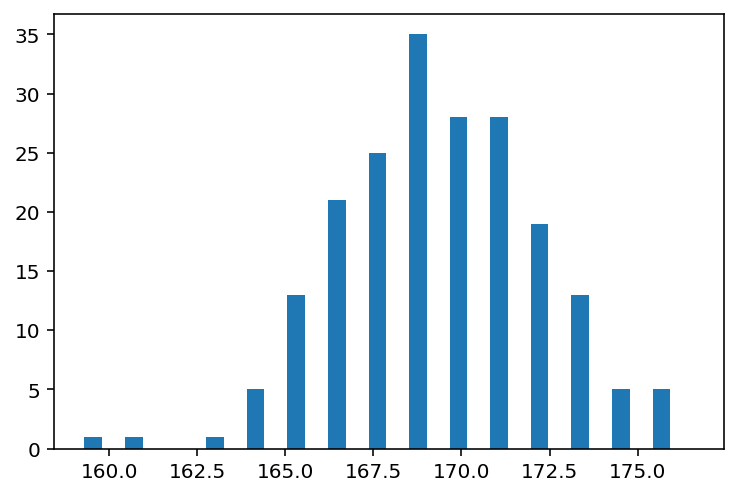

In [2]:
# 평균이 170 표준편차가 3cm인 200명의 키 데이터 생성
n_samples = 200
np.random.seed(19) # 랜덤한 패턴을 하나 선택하는 것
x = np.random.randn(n_samples)*3 + 170
plt.hist(x, bins=15, width=0.5)
plt.show()

## 몸무게 데이터 생성
- 160cm이면 50kg, 190cm이면 90kg의 관계라고 가정하여 몸무게 샘플을 생성
- 선형 관계를 가정하겠다   
    $y = ax + b$  

 50 = 160a + b  
 90 = 190a + b  
 a= 40/30 = 4/3, b= 60 - 160*(4/3)  

a: 1.3333333333333333
b: -153.33333333333331


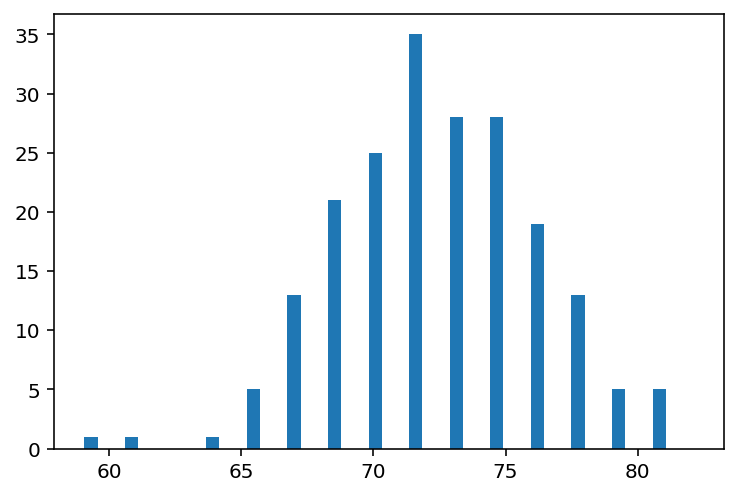

In [3]:
# 몸무게 분포
a = 4/3
b = 60-160*(4/3)
print("a:",a); print("b:",b)
y = a*x + b
plt.hist(y, bins=15, width=0.5)
plt.show()

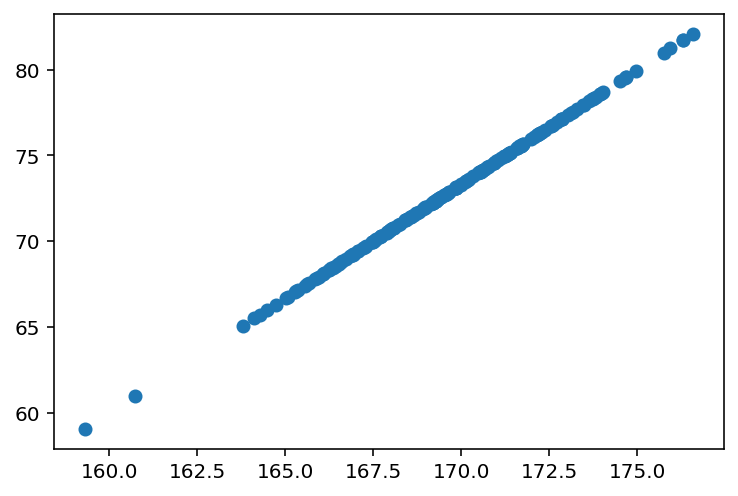

In [4]:
# 키와 몸무게 산포도
plt.scatter(x,y)

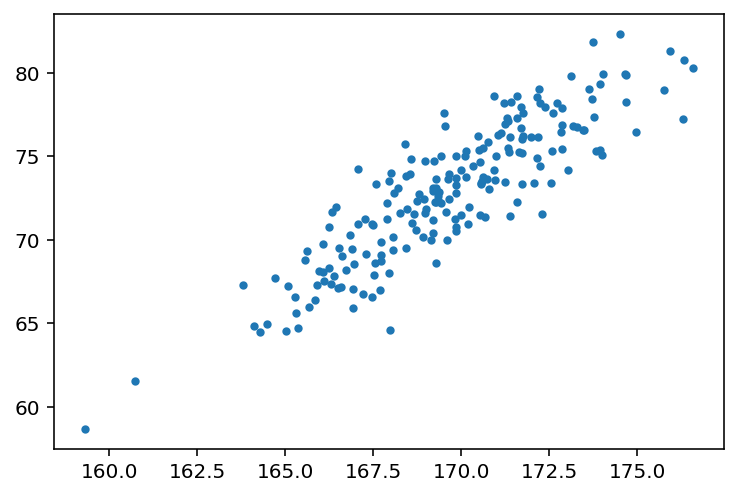

In [5]:
# 실제로 키와 몸무게가 완전히 선형관계는 아니므로 가우시안 잡음을 더한다 (표준편차 2kg 가정)
y = a*x + b + 2*np.random.randn(n_samples)
plt.scatter(x,y, s=10)

In [6]:
# 생성된 키-몸무게 데이터의 상관 계수
np.corrcoef(x,y)

array([[1.        , 0.88045976],
       [0.88045976, 1.        ]])

In [7]:
# 데이터 백업
x_height = x.copy()
y_weight = y.copy()

# 모델 학습과 검증

## 학습 및 검증 데이터 나누기
- 주어진 샘플 데이터(X, y)를 훈련용과 검증용으로 랜덤하게 나누기 위해서 train_test_split 함수를 주로 사용한다
 - 샘플의 순서를 랜덤하게 섞어서 X_train, X_test 등으로 나눈다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

### train_test_split
- 훈련, 검증 데이터를 나누는 함수 train_test_split의 사용법을 배운다

In [8]:
from sklearn.model_selection import train_test_split
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
# train_test_split는 인자로 주어진 데이터를 랜덤하게 75%와 25% 비율로 나눈다
x_train, x_test = train_test_split(x)
x_train, x_test

(array([9, 7, 3, 1, 2, 6, 0]), array([8, 5, 4]))

In [10]:
y = x*10
y

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

- 인자로 두 세트의 데이터를 주면 행을 맞추어서 나눈다

In [11]:
# 검증 데이터 비율을 변경할 수 있다
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [12]:
x_train, x_test

(array([9, 8, 4, 5, 0, 3]), array([6, 1, 7, 2]))

In [13]:
# 랜덤하게 shuffling되는 순서가 X, y에 대해서 유지된다
y_train, y_test

(array([90, 80, 40, 50,  0, 30]), array([60, 10, 70, 20]))

In [14]:
# 훈련 데이터 셋
pd.DataFrame({'x_train':x_train, 'y_train':y_train})

,x_train,y_train
0,9,90
1,8,80
2,4,40
3,5,50
4,0,0
5,3,30


In [15]:
# 검증 데이터 셋
pd.DataFrame({'x_test':x_test, 'y_test':y_test})

,x_test,y_test
0,6,60
1,1,10
2,7,70
3,2,20


## 키-몸무게 훈련 및 검증 데이터 나누기
- 키, 몸무게 전체 샘플 200개를 훈련용 150개, 검증용 50개로 나눈다

In [16]:
# x_height,y_weight를 사용한다
x_train, x_test, y_train, y_test = train_test_split(x_height,y_weight,random_state=19)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((150,), (50,), (150,), (50,))

## 모델 생성, 학습, 사용 절차
- (1) 머신러닝에서 사용할 모델을 선택하고 생성한다
- (2) 훈련 데이터를 사용하여 모델을 학습시킨다 (최적의 파라미터를 구한다)
- (3) 검증 데이터를 사용하여 모델의 동작을 검증하고 성능을 평가한다
- (4) 모델 훈련이나 검증에 한번도 사용하지 않은 별도의(hold out) 테스트 데이터를 사용하여 모델 성능을 최종 평가한다

<img src ="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.02.11.png?raw=1" width=450 align='left'>

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # (1) 모델 선택 및 생성
model.fit(x_train.reshape(-1,1), y_train) # (2) 학습 (훈련)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 배열의 구조 변경

- 파이썬 머신러닝 모델에서 입력 데이터(X)는 최소한 2차원 이상의 배열을 사용해야 한다
- reshape()을 사용하여 1차원 배열을 2차원으로 변형했다

In [19]:
# reshape 사용 예시
z = np.arange(12)
z

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [20]:
print(z.reshape(3,4))
print(z.reshape(6,2))
print(z.reshape(1,12))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11]]


In [21]:
# reshape함수에서 인자 -1를 사용하면 이는 미지수이며 데이터 크기에 맞추라는 뜻이다
print(z.reshape(-1,4))
print(z.reshape(-1,1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


## 모델을 예측에 사용
- 새로운 키 데이터(X)를 주었을 때 이 모델이 예측한 몸무게 보기
- 모델이 목적 변수(y)를 추정하는 것을 추론(inference)라고 한다

In [22]:
# 모델이 찾은 (최적화 한) 파라미터 a, b의 추정 값
model.coef_ , model.intercept_

(array([1.2703997]), -142.67865150228494)

In [23]:
# 최초 몸무게 데이터 생성시에 사용된 계수 (실제 파라미터 값)
a, b

(1.3333333333333333, -153.33333333333331)

In [24]:
# 임의의 키 값에 대한 몸무게 예측
test_input = [[165],[170],[180]]
model.predict(test_input).round(2) # 예측 결과

array([66.94, 73.29, 85.99])

## 회귀 직선
- $\hat{y} = b +a_{1}x_{1}$  로 표현되는 선형 모델이 단변수인 경우(현재 키 값만 있음)는 2차원 평면상의 직선으로 표현된다
 - 입력 변수가 다차원이면 회귀 직선이 다차원이 되어 평면에 그릴 수 없다
  > $\hat{y} = b +a_{1}x_{1} + a_{2}x_{2} + a_{3}x_{3} + ...$

## 훈련, 검증 데이터와 회귀 직선

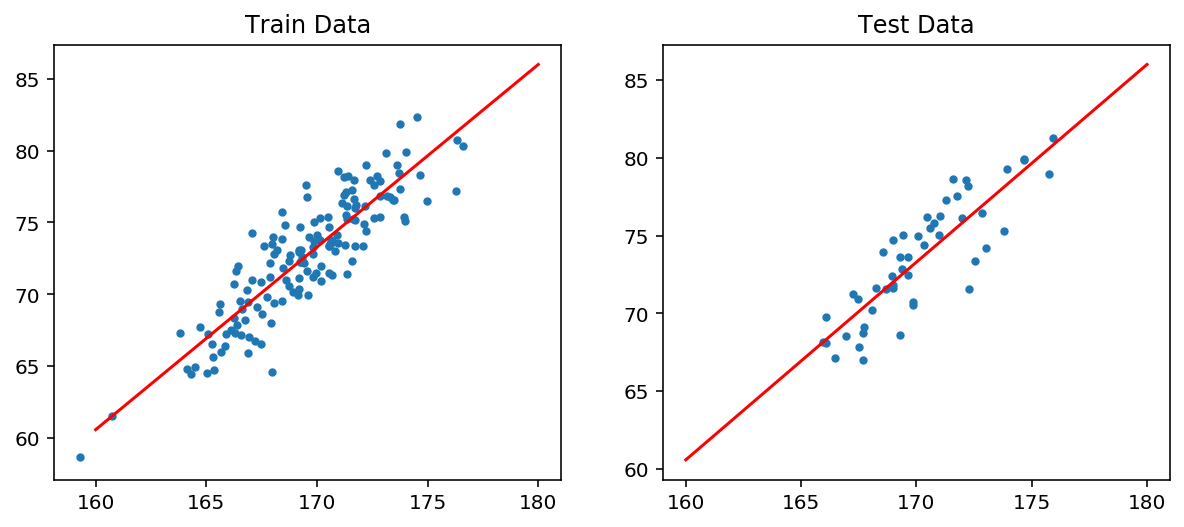

In [25]:
plt.figure(figsize=(10,4))

# 회귀직선
xs = np.linspace(160,180,2)
ys = model.coef_*xs + model.intercept_ 

# 훈련 데이터 분포와 회귀직선
plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_train,y_train, s=10)

# 검증 데이터에 적용될 회귀직선
plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_test,y_test, s=10)

## 동작 검증 및 성능평가
- 학습시킨 모델을 사용하여 검증 데이터에 대한 예측값을 구하고 모델의 성능을 평가한다 

In [26]:
# 예측치 
y_pred = model.predict(x_test.reshape(-1,1))

In [27]:
df = pd.DataFrame({'키':x_test, '몸무게예측값':y_pred, '실제값':y_test})
df[:5]

,키,몸무게예측값,실제값
0,172.827043,76.880772,76.465420
1,170.089681,73.403228,74.999736
2,168.550064,71.447299,73.934757
3,170.611010,74.065524,75.500864
4,166.952023,69.417148,68.573889


In [28]:
df['예측오차'] = y_pred - y_test
df[:5]

,키,몸무게예측값,실제값,예측오차
0,172.827043,76.880772,76.465420,0.415352
1,170.089681,73.403228,74.999736,-1.596507
2,168.550064,71.447299,73.934757,-2.487458
3,170.611010,74.065524,75.500864,-1.435340
4,166.952023,69.417148,68.573889,0.843259


# 모델 성능 평가
- 회귀 모델의 성능을 평가하는 척도로 기본적으로 R-Squared를 사용하며 MAE, RMSE 등을 참고로 본다
 - MAE: mean absolute error  
 - MSE: mean squared error    
 - RMSE: root MSE  

$MAE = $$1\over{N}$$ \sum |y_{i} - \hat{y}|$

$MSE = $$1\over{N}$$ \sum (y_{i} - \hat{y})^{2}$

$RMSE = \sqrt{MSE}$

$R^{2} = 1$-$\sum(y_{i}-\hat{y})^{2}\over{\sum(y_{i}-\bar{y})^{2}}$ $= 1$-$MSE\over{Variance}$  
 >  $y$ :  실제값, $\hat{y}$ :  예측치, $\bar{y}$ :  평균치
 
### R-Squared
- 회귀 성능의 기본적인 평가 지표
- MSE를 분산으로 정규화한 값을 사용한다
- R-sqaured 값은 1에 가까울수록 완벽한 예측을 수행한 것이고, 0 근처이면 오차 평균치가 표준편차 정도인 경우이다

In [29]:
# MAE (단위: kg)
np.abs(y_pred - y_test).mean()

1.5504014320846853

In [30]:
# RMSE (단위:kg)
np.sqrt(((y_pred - y_test)**2).mean())

1.8980745977991238

In [31]:
# R-sqaured 직접 계산
1 - ((y_test - y_pred)**2).sum()/((y_test - y_test.mean())**2).sum()

0.7425970170964126

In [32]:
# 검증 데이터에 대해서 score()함수를 사용하면 R-sqaured를 알려준다
model.score(x_test.reshape(-1,1), y_test)

0.7425970170964126

## 회귀모델의 손실함수
- 손실함수란 모델의 최적화 과정에서 "줄이는 대상값"을 말한다
- 회귀 모델은 손실함수로 대부분 MSE를 사용한다. 즉, MSE가 최소화되도록 최적화기가 동작한다
- 머신러닝의 목적에 따라 손실함수로 MAE나, MSLE (mean sqaure log error)를 사용하기도 한다